### Hosting my notebooks on [Binder](http://docs.mybinder.org/)

# Exploration of a [dataset](https://data.hdx.rwlabs.org/dataset/ebola-outbreaks-before-2014) on Ebola outbreaks before 2014

source: Humanitarian Data Exchange ([HDX](http://data.hdx.rwlabs.org/))

In [21]:
import numpy as np
import pandas as pd

from bokeh.charts import Histogram, Bar, BoxPlot, Scatter
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file

### Loading the dataset to a Pandas dataframe

In [2]:
ebola_df = pd.read_csv("data/out/ebola_outbreaks_before_2014-geometry_fixed.csv", encoding="utf-8", index_col=False)

ebola_data = ebola_df.drop(ebola_df.columns[[0, 1, 2, 9]], axis=1)

In [3]:
ebola_data.head(3)

,country_code_iso_2_digits,country_name,duration_days,ebola_subtype,end_date,end_datetime,geometry,geometry_geojson,latitude,longitude,reported_number_of_deaths_among_cases,reported_number_of_human_cases,reported_of_deaths_among_cases,start_date,start_datetime,year_s
0,RU,Russia,365,Zaire virus,2004-12-31T00:00:00Z,2004-12-31T00:00:00Z,"(POLYGON ((132.448985 42.845404, 132.44988 42....","{u'type': u'MultiPolygon', u'coordinates': [[[...",64.686314,97.745306,1,1,1,2004-01-01T00:00:00Z,2004-01-01T00:00:00Z,2004
1,PH,Philippines,365,Reston virus,1996-12-31T00:00:00Z,1996-12-31T00:00:00Z,"(POLYGON ((119.849783 4.796861, 119.833995 4.7...","{u'type': u'MultiPolygon', u'coordinates': [[[...",12.750349,122.731210,0,0,0,1996-01-01T00:00:00Z,1996-01-01T00:00:00Z,1996
2,US,USA,364,Reston virus,1990-12-31T00:00:00Z,1990-12-31T00:00:00Z,"(POLYGON ((-155.606519 20.137956, -155.586363 ...","{u'type': u'MultiPolygon', u'coordinates': [[[...",39.783730,-100.445882,0,4,0,1990-01-01T00:00:00Z,1990-01-01T00:00:00Z,1990


### Ebola outbreaks per country

In [4]:
# Handle non-ASCII character
ebola_data = ebola_data.replace(u"C\xf4te d'Ivoire (Ivory Coast)", 
                                u"Cote d'Ivoire (Ivory Coast)")

#### General description

In [5]:
outbrks_data = ebola_data.groupby(["country_name"])["country_name"].count().order()

print outbrks_data

outbrks_data.describe()

country_name
Cote d'Ivoire (Ivory Coast)         1
England                             1
Italy                               1
South Africa                        1
Russia                              2
Philippines                         3
Sudan (South Sudan)                 3
USA                                 3
Gabon                               4
Uganda                              5
Democratic Republic of the Congo    9
Name: country_name, dtype: int64


count    11.000000
mean      3.000000
std       2.408319
min       1.000000
25%       1.000000
50%       3.000000
75%       3.500000
max       9.000000
Name: country_name, dtype: float64

* Prior to 2014, there has been Ebola outbreaks in **11** countries.

* Those countries have had between **1** and **9** outbreaks.

#### Distribution of outbreaks per country

In [6]:
total_outbrks = ebola_data.groupby(["country_name"])["country_name"].count().sum()
outbrks_percent = outbrks_data.mul(100).truediv(total_outbrks)

data = outbrks_percent.to_frame(name='proportions of outbreaks (%)')

print data

bar_outbrks = Bar(data, values='proportions of outbreaks (%)', color='navy',
                   title="Proportion of ebola outbreaks per country in %")

output_notebook()
output_file("outbreaks.html", title="Proportion of ebola outbreaks per country in %")

show(bar_outbrks)

                                  proportions of outbreaks (%)
country_name                                                  
Cote d'Ivoire (Ivory Coast)                           3.030303
England                                               3.030303
Italy                                                 3.030303
South Africa                                          3.030303
Russia                                                6.060606
Philippines                                           9.090909
Sudan (South Sudan)                                   9.090909
USA                                                   9.090909
Gabon                                                12.121212
Uganda                                               15.151515
Democratic Republic of the Congo                     27.272727


Loading BokehJS ...

* Almost one third of the outbreaks before 2014 happened in DRC

#### Distribution of ebola victims per country

In [23]:
ebola_data[["country_name", "reported_number_of_human_cases"]].groupby(["country_name"]).sum()

,reported_number_of_human_cases
country_name,
Cote d'Ivoire (Ivory Coast),1
Democratic Republic of the Congo,1201
England,1
Gabon,214
Italy,0
Philippines,9
Russia,2
South Africa,2
Sudan (South Sudan),335


In [8]:
df_ebola_victims = ebola_data[["country_name", "reported_number_of_human_cases", 
                             "reported_number_of_deaths_among_cases"]]

In [9]:
box_ev = BoxPlot(df_ebola_victims, values="reported_number_of_human_cases",
                 label='country_name', title="Number of ebola victims per country",
                 outliers=False, whisker_color='country_name')

output_notebook()
output_file("victims.html", title="Number of ebola victims per country")

show(box_ev)

Loading BokehJS ...

In [11]:
ebola_data[["country_name", "reported_number_of_deaths_among_cases"]].groupby(["country_name"]).sum()

,reported_number_of_deaths_among_cases
country_name,
Cote d'Ivoire (Ivory Coast),0
Democratic Republic of the Congo,946
England,0
Gabon,150
Italy,0
Philippines,0
Russia,2
South Africa,1
Sudan (South Sudan),180


In [10]:
box_ed = BoxPlot(df_ebola_victims, values="reported_number_of_deaths_among_cases", 
                 label='country_name', title="Number of deaths from ebola per country",
                 outliers=False, whisker_color='country_name')

output_notebook()
output_file("deaths.html", title="Number of deaths from ebola per country")

show(box_ed)

Loading BokehJS ...

* The number of victims (cases and deaths) tends to vary in one country depending on the outbreak
* The number of victims seem to correlate with the number of outbreak except when looking at The USA and South Sudan.

The number of victims could be due to the country's health system or the moment in time when the outbreak occurred.

=> It be interested to plot the number of victims vs the number of outbreaks, a value from WHO representing countries health system score and to look at the number of victims over time

I'd like to look at: 
* number of human cases vs virus subtype
* number of human deaths vs virus subtype
* number of outbreaks vs number of human cases
* number of outbreaks vs average length of outbreaks
* number of human cases vs average length of outbreaks
* look at the timeline of global outbreaks and outbreaks per affected country
* look at the global state of the most frequently affected countries

#### Virus subtypes

In [16]:
ebola_data[["ebola_subtype", "reported_number_of_human_cases"]].groupby(["ebola_subtype"]).sum()

,reported_number_of_human_cases
ebola_subtype,
Bundibugyo virus,185
Reston virus,13
Sudan virus,779
Taï Forest virus,1
Zaire virus,1383


In [17]:
ebola_data[["ebola_subtype", "reported_number_of_deaths_among_cases"]].groupby(["ebola_subtype"]).sum()

,reported_number_of_deaths_among_cases
ebola_subtype,
Bundibugyo virus,50
Reston virus,0
Sudan virus,412
Taï Forest virus,0
Zaire virus,1086


In [18]:
ebola_virus_cases = ebola_data[["ebola_subtype", "reported_number_of_human_cases"]]

KeyError: 'ebola_subtype'

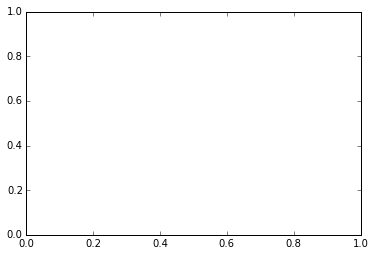

In [34]:
ebola_data.plot(kind='scatter', x='ebola_subtype', y='reported_number_of_human_cases')

In [27]:
scatter = Scatter(ebola_virus_cases, x='ebola_subtype', y='reported_number_of_human_cases', color='cyl',
                  title="Reported human cases by virus subtypes", xlabel="Ebola subtypes", ylabel="Reported human cases")

show(scatter)

ValueError: expected an element of either Enum('aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen'), Regex('^#[0-9a-fA-F]{6}$'), Tuple(Byte(Int, 0, 255), Byte(Int, 0, 255), Byte(Int, 0, 255)) or Tuple(Byte(Int, 0, 255), Byte(Int, 0, 255), Byte(Int, 0, 255), Percent), got 'cyl'